<a href="https://colab.research.google.com/github/rodespdi/PDA2526/blob/main/DCT_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargando la imagen 'camera' desde la biblioteca skimage...


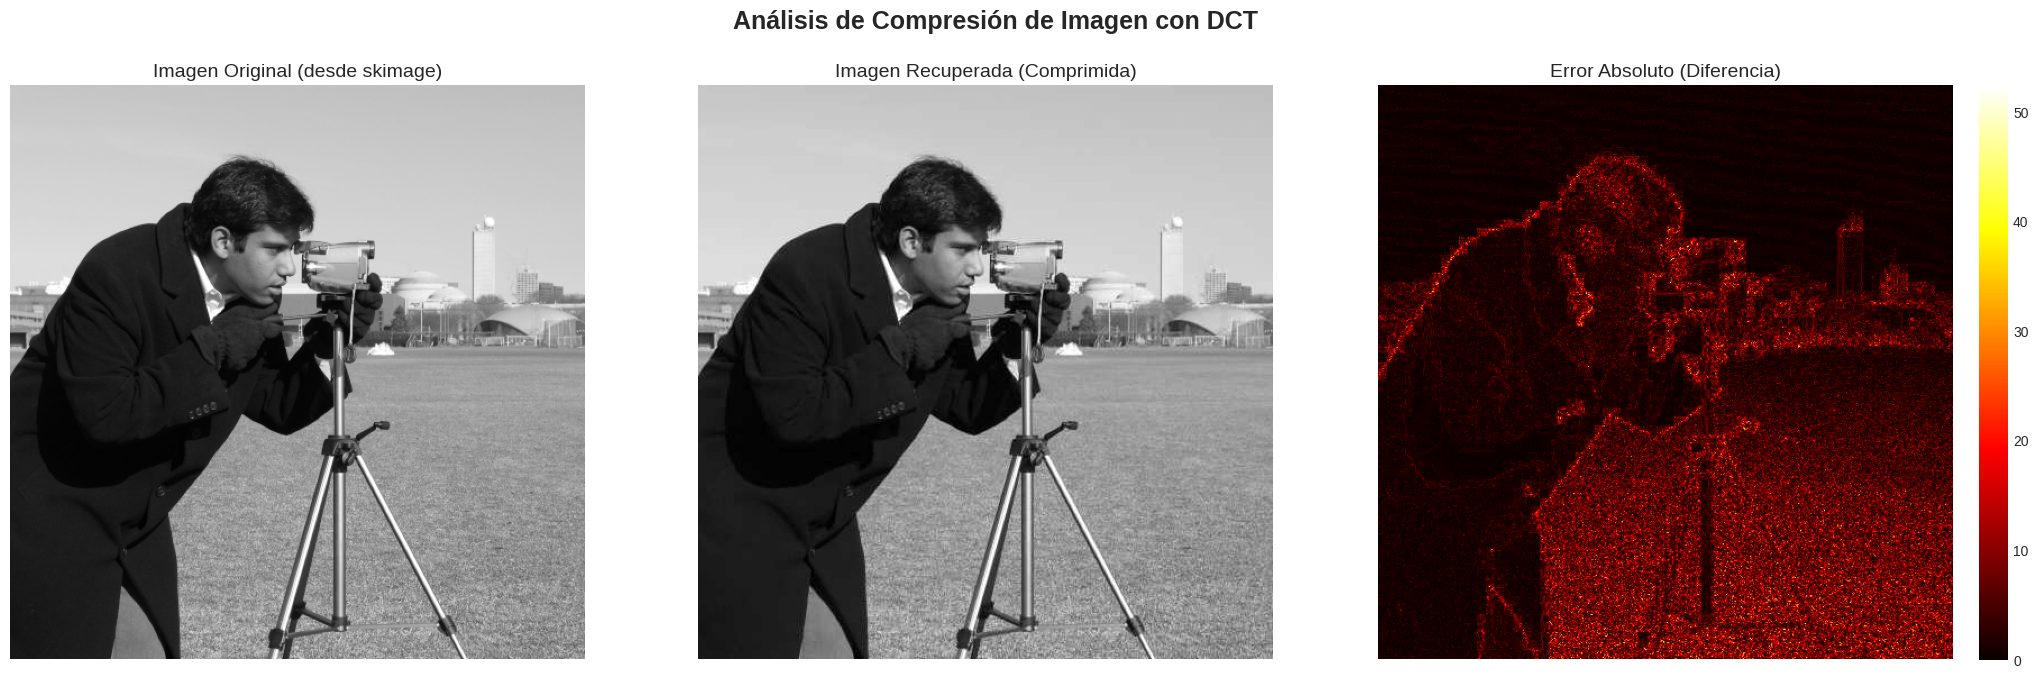


--- Métricas de Calidad de la Reconstrucción ---
📉 Error Cuadrático Medio (MSE): 35.89
   (Valores más bajos son mejores. Cero = perfecto)
📈 Índice de Similitud Estructural (SSIM): 0.9142
   (Valores más cercanos a 1 son mejores)


In [10]:
#@title Compresión DCT con Imagen Local

# Instala la biblioteca si es necesario
!pip install scikit-image -q

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data # Importamos el módulo de datos
from skimage.metrics import mean_squared_error, structural_similarity

# --- 1. Cargar la imagen desde la biblioteca scikit-image ---
# La función fue renombrada de 'cameraman()' a 'camera()' en versiones nuevas.
print("Cargando la imagen 'camera' desde la biblioteca skimage...")
img_gray = data.camera() # <--- CORRECCIÓN AQUÍ
img_original_float = img_gray.astype(float)

# --- 2. Matriz de Cuantificación Estándar de JPEG ---
Q_matrix = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61], [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56], [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77], [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101], [72, 92, 95, 98, 112, 100, 103, 99]
])

# --- 3. Proceso de Compresión y Reconstrucción por Bloques ---
block_size = 8
height, width = img_original_float.shape
img_reconstructed = np.zeros_like(img_original_float)

for r in range(0, height, block_size):
    for c in range(0, width, block_size):
        block = img_original_float[r:r+block_size, c:c+block_size]
        dct_block = cv2.dct(block)
        quantized_block = np.round(dct_block / Q_matrix)
        dequantized_block = quantized_block * Q_matrix
        reconstructed_block = cv2.idct(dequantized_block)
        img_reconstructed[r:r+block_size, c:c+block_size] = reconstructed_block

# --- 4. Cálculo de las métricas de error ---
mse = mean_squared_error(img_original_float, img_reconstructed)
ssim = structural_similarity(img_original_float, img_reconstructed, data_range=255)

# --- 5. Visualización de Resultados ---
error_image = np.abs(img_original_float - img_reconstructed)

plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(1, 3, figsize=(21, 7))

# Imagen Original
axs[0].imshow(img_original_float, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Imagen Original (desde skimage)', fontsize=14)
axs[0].axis('off')

# Imagen Comprimida/Recuperada
axs[1].imshow(img_reconstructed, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Imagen Recuperada (Comprimida)', fontsize=14)
axs[1].axis('off')

# Imagen de Error
im = axs[2].imshow(error_image, cmap='hot', vmin=0)
axs[2].set_title('Error Absoluto (Diferencia)', fontsize=14)
axs[2].axis('off')
fig.colorbar(im, ax=axs[2], orientation='vertical', fraction=0.046, pad=0.04)

plt.suptitle('Análisis de Compresión de Imagen con DCT', fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Imprimir las métricas de calidad ---
print("\n--- Métricas de Calidad de la Reconstrucción ---")
print(f"📉 Error Cuadrático Medio (MSE): {mse:.2f}")
print("   (Valores más bajos son mejores. Cero = perfecto)")
print(f"📈 Índice de Similitud Estructural (SSIM): {ssim:.4f}")
print("   (Valores más cercanos a 1 son mejores)")

Claro, aquí tienes un resumen textual de todo el proceso, sin incluir el código.

### **Resumen del Proceso de Compresión de Imágenes con DCT**

El programa demuestra cómo funciona la compresión de imágenes, similar a la del formato JPEG, siguiendo varios pasos clave:

---
#### **1. Preparación e Importación**

Primero, el script se asegura de tener todas las herramientas necesarias. Importa bibliotecas de Python especializadas: una para **cálculos numéricos** (NumPy), otra para **procesamiento de imágenes** (OpenCV y Scikit-image), y una última para **crear gráficos** (Matplotlib).

---
#### **2. Carga de la Imagen**

En lugar de depender de un enlace de internet que podría romperse, el programa carga una **imagen de prueba estándar ("camera")** que viene incluida dentro de la biblioteca `scikit-image`. Esta imagen, que está en escala de grises, se convierte a un formato numérico de alta precisión (números flotantes) para poder realizar los cálculos matemáticos correctamente.

---
#### **3. El Proceso de Compresión y Reconstrucción**

El núcleo del programa no trabaja con la imagen completa de una vez, sino que la recorre **dividiéndola en pequeños bloques de 8x8 píxeles**. Para cada uno de estos bloques, realiza el siguiente ciclo:

1.  **Transformación (DCT)**: Aplica la **Transformada de Coseno Discreta (DCT)**, una operación matemática que convierte los 64 valores de píxeles del bloque en 64 coeficientes de "frecuencia". Los coeficientes de baja frecuencia (que representan las áreas de color suave) son los más importantes para nuestra vista, mientras que los de alta frecuencia (los detalles finos y texturas) lo son menos.

2.  **Cuantificación (La Compresión Real)**: Este es el paso donde se pierde información para ahorrar espacio. El script divide los 64 coeficientes de frecuencia por una **matriz de cuantificación** predefinida. Esta matriz tiene números pequeños para las bajas frecuencias (conservando su calidad) y números muy grandes para las altas frecuencias. Al dividir y redondear, muchos de los coeficientes de alta frecuencia (los detalles menos importantes) se convierten en cero, logrando la compresión.

3.  **Reconstrucción (Proceso Inverso)**: Para poder ver el resultado, el programa invierte el proceso. Multiplica los coeficientes comprimidos por la misma matriz de cuantificación y luego aplica la **DCT Inversa** para convertir los coeficientes de frecuencia de nuevo en valores de píxeles.

Una vez que se ha procesado cada bloque, se unen todos para formar la **imagen final reconstruida**.

---
#### **4. Medición de la Calidad**

Tras reconstruir la imagen, el script la compara con la original para medir cuánta calidad se perdió. Lo hace de dos formas:

-   **Error Cuadrático Medio (MSE)**: Una medida puramente matemática del error. Un número más bajo es mejor.
-   **Índice de Similitud Estructural (SSIM)**: Una métrica más avanzada que intenta imitar cómo percibe un humano la similitud entre dos imágenes. Un valor cercano a 1 indica una reconstrucción casi perfecta.

---
#### **5. Visualización de los Resultados**

Finalmente, el programa muestra tres imágenes una al lado de la otra:

1.  **La imagen original**.
2.  **La imagen reconstruida** después de la compresión.
3.  **Una "imagen de error"**, que muestra en un mapa de calor dónde se encuentran las mayores diferencias entre la original y la reconstruida. Las zonas más brillantes en esta imagen (generalmente los bordes y texturas) son donde más información se ha perdido.

Además, imprime en la consola los valores numéricos del MSE y el SSIM para dar una evaluación cuantitativa del resultado.